# Prediction of the target attribute *'round_winner'*

#### Preproccesing

In [189]:
#imports of required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [271]:
#loading of dataset
df = pd.read_csv('C:/Users/danji/Desktop/VŠE/ZS 22-23/POKROČILÉ PŘÍSTUPY K DOLOVÁNÍ ZNALOSTÍ Z DATABÁZÍ/4iz460-csgo/data/csgo_round_snapshots_processed.csv', sep=',')

In [272]:
#exploring data
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_weapon_bizon_price,t_weapon_nova_price,t_weapon_xm1014_price,t_weapon_scar20_price,t_weapon_r8revolver_price,t_weapon_negev_price,t_category_machine gun_price,ct_weapon_p90_price,ct_weapon_m249_price,ct_category_machine gun_price
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
#looking at the shape of data
df.shape

(122410, 194)

In [193]:
le = LabelEncoder() 

In [274]:
#encoding 'map' attribute
df['map'] = le.fit_transform(df['map'])
map_mappings = {index: label for index, label in enumerate(le.classes_)}
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [275]:
#encoding 'bomb_planted' attribute
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
bomb_planted_mappings = {index: label for index, label in enumerate(le.classes_)}
bomb_planted_mappings

{0: False, 1: True}

In [276]:
#encoding 'round_winner' attribute
df['round_winner'] = le.fit_transform(df['round_winner'])
winner_mappings = {index: label for index, label in enumerate(le.classes_)}
winner_mappings

{0: 'CT', 1: 'T'}

In [277]:
#y = labels
y = df['round_winner']

#X = features
X = df[['ct_health', 't_health', 'ct_armor', 'map', 't_armor', 'bomb_planted', 'ct_players_alive', 't_players_alive', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_overall_investment', 't_overall_investment']]

In [278]:
X

,ct_health,t_health,ct_armor,map,t_armor,bomb_planted,ct_players_alive,t_players_alive,ct_helmets,t_helmets,ct_defuse_kits,ct_overall_investment,t_overall_investment
0,500.0,500.0,0.0,1,0.0,0,5.0,5.0,0.0,0.0,0.0,1000.0,1000.0
1,500.0,500.0,400.0,1,300.0,0,5.0,5.0,0.0,0.0,1.0,4000.0,3550.0
2,391.0,400.0,294.0,1,200.0,0,4.0,4.0,0.0,0.0,1.0,3150.0,2700.0
3,391.0,400.0,294.0,1,200.0,0,4.0,4.0,0.0,0.0,1.0,3150.0,2100.0
4,500.0,500.0,192.0,1,0.0,0,5.0,5.0,0.0,0.0,1.0,2700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,200.0,242.0,195.0,6,359.0,1,2.0,4.0,2.0,4.0,1.0,7650.0,19150.0
122406,500.0,500.0,95.0,6,175.0,0,5.0,5.0,1.0,2.0,1.0,6000.0,11150.0
122407,500.0,500.0,495.0,6,475.0,0,5.0,5.0,3.0,5.0,1.0,13500.0,23950.0
122408,500.0,500.0,495.0,6,475.0,0,5.0,5.0,3.0,5.0,1.0,11400.0,26150.0


In [199]:
y.value_counts()

1    62406
0    60004
Name: round_winner, dtype: int64

In [200]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Training and testing data

In [201]:
#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (85687, 13)
Training Labels Shape: (85687,)
Testing Features Shape: (36723, 13)
Testing Labels Shape: (36723,)


In [202]:
#statistics for each column
df.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_weapon_bizon_price,t_weapon_nova_price,t_weapon_xm1014_price,t_weapon_scar20_price,t_weapon_r8revolver_price,t_weapon_negev_price,t_category_machine gun_price,ct_weapon_p90_price,ct_weapon_m249_price,ct_category_machine gun_price
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,3.520170,0.111788,412.106568,402.714500,314.142121,298.444670,9789.023773,...,0.114370,0.127441,0.522833,0.040846,0.034311,0.046565,0.046565,0.383956,0.042480,0.042480
std,54.465238,4.790362,4.823543,1.929088,0.315107,132.293290,139.919033,171.029736,174.576545,11215.042286,...,12.653295,12.365828,32.332668,14.290965,4.537130,16.291700,16.291700,30.035904,14.862604,14.862604
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,2.000000,0.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,3.000000,0.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,5.000000,0.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,7.000000,1.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,...,1400.000000,1200.000000,2000.000000,5000.000000,600.000000,5700.000000,5700.000000,2350.000000,5200.000000,5200.000000


### Random Forest

In [243]:
#RandomForestClassifier
#create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

#fit the classifier to the training data
rfc.fit(X_train, y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", rfc.score(X_train, y_train))
print("Accuracy on test data:", rfc.score(X_test, y_test))

Accuracy on train data: 0.9756439133124044
Accuracy on test data: 0.8101189989924571


In [351]:
#tuning Random Forest classifier
param_grid = { 
    'n_estimators': [100, 250, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [20, 40],
    'criterion' :['gini', 'entropy']
}

In [352]:
#looking for the best parameters of random forest classifier
cv_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=40, max_features='sqrt',
                                              n_estimators=500,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 250, 500]})

In [353]:
#best parameters
cv_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [354]:
rfc = RandomForestClassifier(random_state=42, max_features = 'sqrt', n_estimators = 500, max_depth = 40, criterion = 'gini')

In [355]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=500,
                       random_state=42)

In [356]:
#storing the predictions of random forest for evaluation
rfc_predictions = rfc.predict(X_test)

In [357]:
#accuracy score on test data for random forest
rfc_acc = accuracy_score(y_test, rfc_predictions)
print(f'Random Forest accuracy after parameter tuning: {rfc_acc*100:.2f}%')

Random Forest accuracy after parameter tuning: 82.67%


In [358]:
#classification report for random forest
rfc_report = classification_report(y_test, rfc_predictions, output_dict=True)
df_report = pd.DataFrame(rfc_report).transpose()
df_report

,precision,recall,f1-score,support
0,0.822348,0.825856,0.824098,18054.000000
1,0.830895,0.827468,0.829178,18669.000000
accuracy,0.826675,0.826675,0.826675,0.826675
macro avg,0.826622,0.826662,0.826638,36723.000000
weighted avg,0.826693,0.826675,0.826681,36723.000000


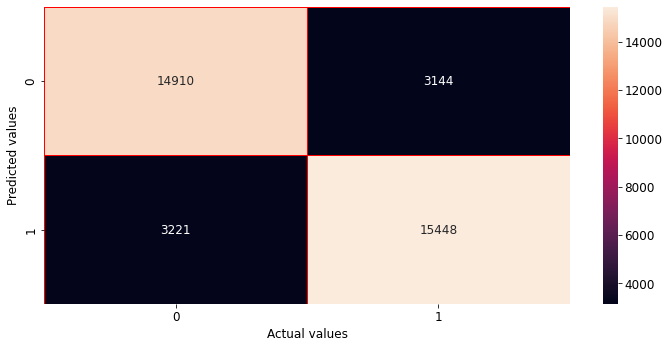

In [359]:
#confusion metrix for random forest
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, rfc_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = rfc.classes_,
    yticklabels = rfc.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

In [282]:
plt.rcParams["figure.figsize"] = (6, 10)
plt.rcParams["font.size"] = 12

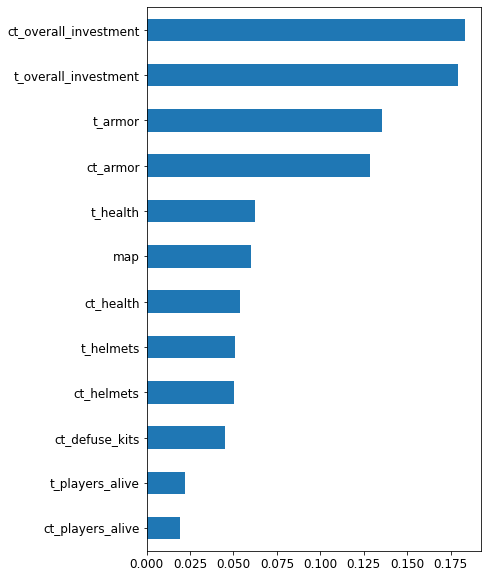

In [283]:
#plot the most important features for random forest classifier in its decesion making
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh').invert_yaxis()

### KNN

In [285]:
#KNN
#create a KNN Classifier with randomly chosen number of 8 neighbors
knn = KNeighborsClassifier(n_neighbors = 10)

#fit the classifier to the training data
knn.fit(X_train,y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", knn.score(X_train, y_train))
print("Accuracy on test data:", knn.score(X_test, y_test))

Accuracy on train data: 0.8115466756917619
Accuracy on test data: 0.7736296054243934


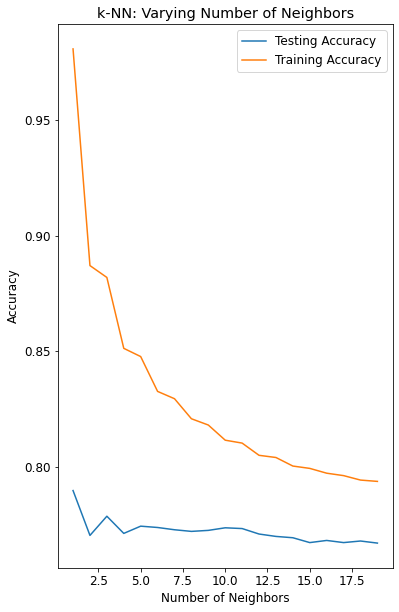

In [290]:
#tuning KNN
#setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over different values of k
for i, k in enumerate(neighbors):
    
    #setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    #fit the classifier to the training data
    knn.fit(X_train, y_train)

    #compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [292]:
#create a k-NN classifier with tuned parameters that perform the best; k = 3
knn = KNeighborsClassifier(n_neighbors = 3)

#fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [293]:
#storing the predictions of knn for evaluation
knn_predictions = knn.predict(X_test)

In [294]:
#accuracy score on test data for knn
knn_acc = accuracy_score(y_test, knn_predictions)
print(f'KNN accuracy after parameter tuning: {knn_acc*100:.2f}%')

KNN accuracy after parameter tuning: 77.86%


In [227]:
#classification report for knn
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
df_report = pd.DataFrame(knn_report).transpose()
df_report

,precision,recall,f1-score,support
0,0.776786,0.771408,0.774088,18054.00000
1,0.780409,0.785634,0.783013,18669.00000
accuracy,0.778640,0.778640,0.778640,0.77864
macro avg,0.778597,0.778521,0.778550,36723.00000
weighted avg,0.778628,0.778640,0.778625,36723.00000


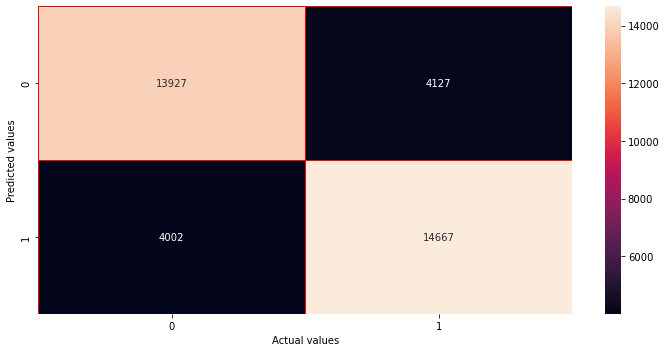

In [228]:
#confusion metrix for knn
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, knn_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = knn.classes_,
    yticklabels = knn.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

### MLPClassifier

In [299]:
#MLP
nn = MLPClassifier(random_state=42)

#fit the classifier to the training data
nn.fit(X_train, y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", nn.score(X_train, y_train))
print("Accuracy on test data:", nn.score(X_test, y_test))

Accuracy on train data: 0.7638264847643167
Accuracy on test data: 0.7560656809084225


In [300]:
#tuning MLP
param_grid = { 
    'hidden_layer_sizes': [(5,10,5),(10,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [301]:
#looking for the best parameters of neural network
cv_nn = GridSearchCV(estimator = nn, param_grid = param_grid, cv = 5)
cv_nn.fit(X_train, y_train)

C:\Users\danji\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(5, 10, 5), (10,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [302]:
#best parameters
cv_nn.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (5, 10, 5),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [347]:
#storing the predictions of MLP for evaluation
nn_predictions = cv_nn.predict(X_test)

In [348]:
#accuracy score on test data for MLP
nn_acc = accuracy_score(y_test, nn_predictions)
print(f'Random Forest accuracy after parameter tuning: {nn_acc*100:.2f}%')

Random Forest accuracy after parameter tuning: 75.50%


In [349]:
#classification report for MLP
nn_report = classification_report(y_test, nn_predictions, output_dict=True)
df_report = pd.DataFrame(nn_report).transpose()
df_report

,precision,recall,f1-score,support
0,0.740518,0.772183,0.756020,18054.000000
1,0.770185,0.738336,0.753924,18669.000000
accuracy,0.754976,0.754976,0.754976,0.754976
macro avg,0.755352,0.755260,0.754972,36723.000000
weighted avg,0.755600,0.754976,0.754954,36723.000000


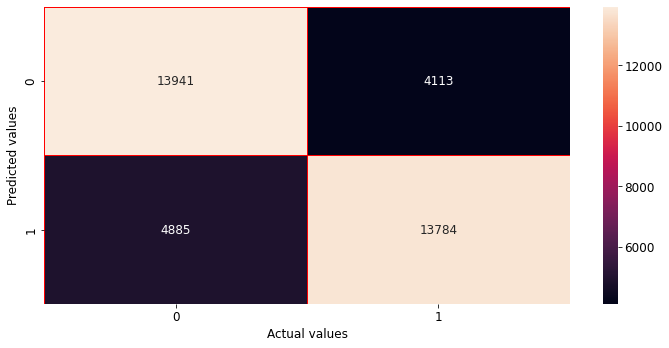

In [350]:
#confusion metrix for MLP
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, nn_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = nn.classes_,
    yticklabels = nn.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

### Logistic Regression

In [289]:
#LogisticRegression
#create a Logistic Regression Classifier
lr = LogisticRegression(random_state=42)

#fit the classifier to the training data
lr.fit(X_train,y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", lr.score(X_train, y_train))
print("Accuracy on test data:", lr.score(X_test, y_test))

Accuracy on train data: 0.7493318706454888
Accuracy on test data: 0.7503744247474335


In [336]:
#tuning LogisticRegression
param_grid = { 
    'penalty':['l1', 'l2'],
    'C':[1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [337]:
#looking for the best parameters of random forest classifier
cv_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5)
cv_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [338]:
#best parameters
cv_lr.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [339]:
#storing predictions of logisitic regression classifier for evaluation
#logreg_2 predicted the best, therefore we are saving that one
lr_predictions = cv_lr.predict(X_test)

In [340]:
#accuracy score on test data for logistic regression
lr_acc = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression accuracy  after parameter tuning: {lr_acc*100:.2f}%')

Logistic Regression accuracy  after parameter tuning: 75.04%


In [341]:
#classification report for logistic regression
lr_report = classification_report(y_test, lr_predictions, output_dict=True)
df_report = pd.DataFrame(lr_report).transpose()
df_report

,precision,recall,f1-score,support
0,0.739505,0.760109,0.749665,18054.000000
1,0.761588,0.741068,0.751188,18669.000000
accuracy,0.750429,0.750429,0.750429,0.750429
macro avg,0.750546,0.750588,0.750427,36723.000000
weighted avg,0.750731,0.750429,0.750439,36723.000000


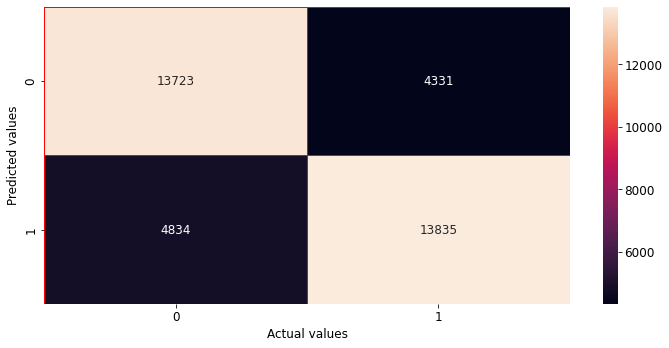

In [342]:
#confusion metrix for logistic regression
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, lr_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = lr.classes_,
    yticklabels = lr.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()